# KAN Symbolic Regression Example

This notebook demonstrates the use of KAN (Kolmogorov-Arnold Networks) for symbolic regression using the `kan_sr` module.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from openai import OpenAI
import os
import sys
import sympy
from sympy import symbols

# Add the parent directory to the path to import LLMSR
sys.path.append('..')
from LLMSR import kan_sr
from kan import KAN
import LLMSR.llm

## Set up OpenAI client

You need to have an OpenAI API key for this example to work.

In [2]:
client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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", 
)
LLMSR.llm.check_key_limit(client)


# Custom system prompt for the LLM
system_prompt_for_second_simplification = None#"""
# You are a mathematical assistant specializing in symbolic regression. 
# Your task is to simplify mathematical expressions as much as possible while preserving their meaning.
# You should combine terms, factor expressions, and apply algebraic ide|ntities where appropriate.
# Express your answer in the clearest mathematical form possible.
# """

2025-03-11 06:14:00,850 - LLMSR.llm - INFO - API key check successful. Remaining limit: None


## Example 1: Simple Polynomial Function

We'll start with a simple example to demonstrate the basic workflow.

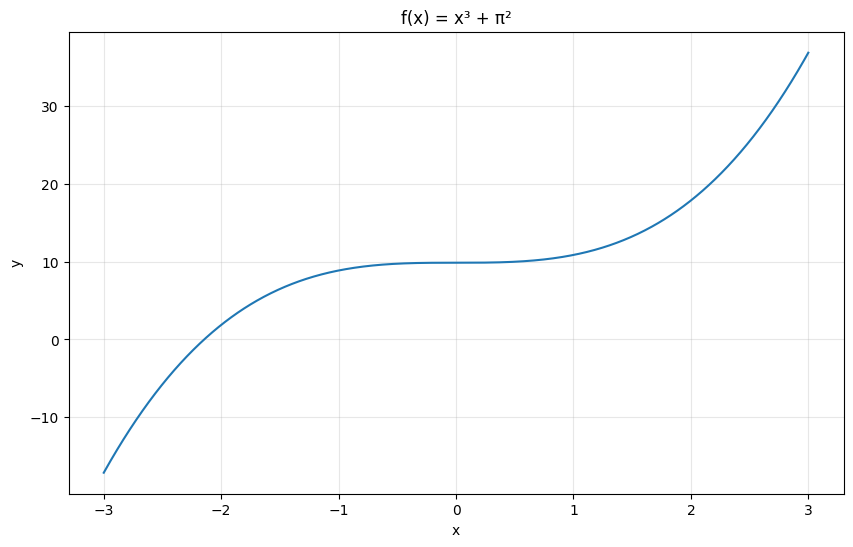

In [3]:
# Define a target function: f(x) = x³ + π²
def target_function(x):
    return (x**3 + np.pi**2)

# Define the function as a PyTorch function
def f(x):
    return (x**3 + torch.pi**2)

# Plot the function
x_range = (-3, 3)
x = np.linspace(x_range[0], x_range[1], 1000)
y = target_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = x³ + π²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

## Train a KAN model and convert it to symbolic expressions

Now we'll use our `kan_sr` module to train a KAN model and extract symbolic expressions.

cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.19e-04 | test_loss: 5.89e-04 | reg: 1.97e+01 | : 100%|█| 1000/1000 [02:54<00:00,  5.


saving model version 0.1
saving model version 0.2


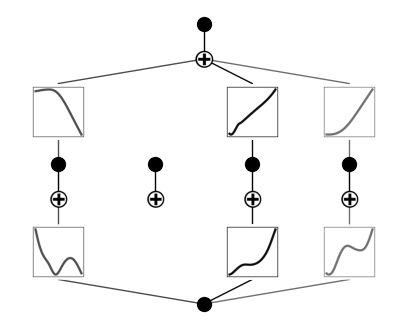

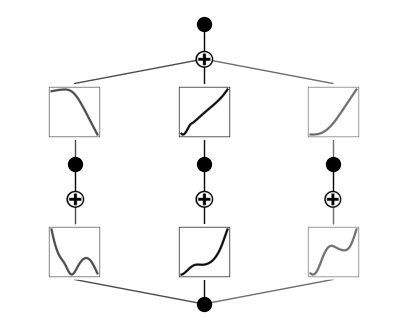

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Set up KAN model parameters
width = [1, 4, 1]  # Network architecture
grid = 7           # Grid size
k = 3              # Number of basis functions
train_steps = 1000  # Number of training steps
seed = 17


# Create a KAN model
model =  model = KAN(width=width, grid=grid, k=k, seed=seed, device=  device , symbolic_enabled=False)

# Create a dataset
dataset = kan_sr.create_dataset(f, n_var=1, ranges=x_range, train_num=10000, test_num=1000, device="cpu")
res = model.fit(dataset, opt='LBFGS', steps=train_steps)
pruned_model = model.prune(node_th=0.2, edge_th=0.2)
train_loss = res['train_loss']
model.plot()
pruned_model.plot()

2025-03-11 04:55:05,434 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-11 04:55:05,435 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


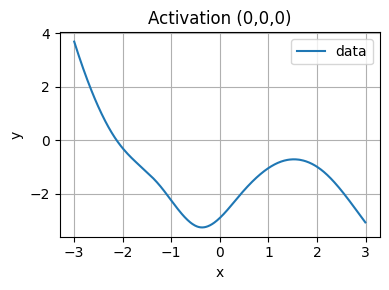

2025-03-11 04:55:05,506 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-11 04:55:05,507 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 1.7175788178129852, for constant: [-1.17310564]
2025-03-11 04:55:05,507 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 04:55:09,501 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 04:55:09,501 - LLMSR.llmSR - INFO - Initial population best: score=-4301.797778818027, params=[-0.43156459], ansatz: params[0] * x...
2025-03-11 04:55:09,502 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 04:55:16,984 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.6846621467970211, params=[ 1.28459396  1.73648212 -2.330794    0.62401143], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.cos(params[3] * x)...
2025-03-11 04:55:16,985 - LLMSR.llmSR - INFO - Generation 2/9: Generating 10 new indivi


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 1
  Success rate: 99.01%

Breakdown by processing stage:
  Api Call: 101 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 1 failed (99.01% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 1
Approximation for (0,0,0): params[0] * x**3 + params[1] * np.sin(x) + params[2] * x + params[3] * np.cos(x) + params[4], with parameters [-0.025  1.882 -0.946 -1.341 -1.171]


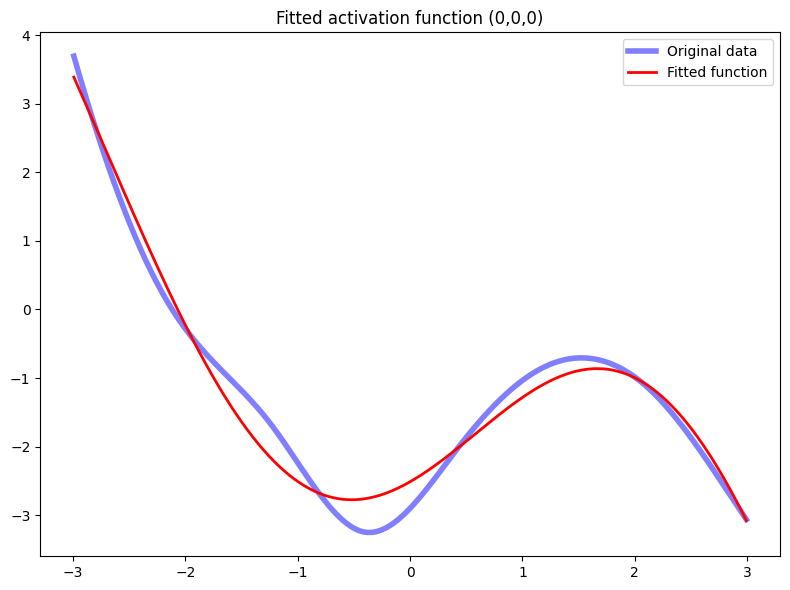

2025-03-11 04:55:54,637 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


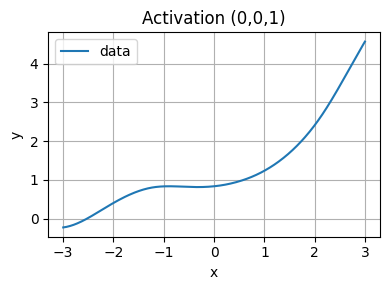

2025-03-11 04:55:54,826 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-11 04:55:54,826 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.7960778800886169, for constant: [1.26350676]
2025-03-11 04:55:54,827 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 04:56:01,778 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 04:56:01,779 - LLMSR.llmSR - INFO - Initial population best: score=-89.32018213031604, params=[1.29181746 0.58380796], ansatz: params[0] + params[1] * x...
2025-03-11 04:56:01,780 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 04:56:06,084 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.5207164586928008, params=[ 6.87948496  0.59160696 -6.0049749   0.02413348], ansatz: params[0] + params[1] * x + params[2] * np.exp(-params[3] * x**2)...
2025-03-11 04:56:06,084 - LLMSR.llmSR - INFO - Generation 2/9: Generat


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 3
  Success rate: 97.09%

Breakdown by processing stage:
  Api Call: 103 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 3 failed (97.09% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 3
Approximation for (0,0,1): params[0] * np.exp(params[1] * x) + params[2], with parameters [0.609 0.659 0.191]


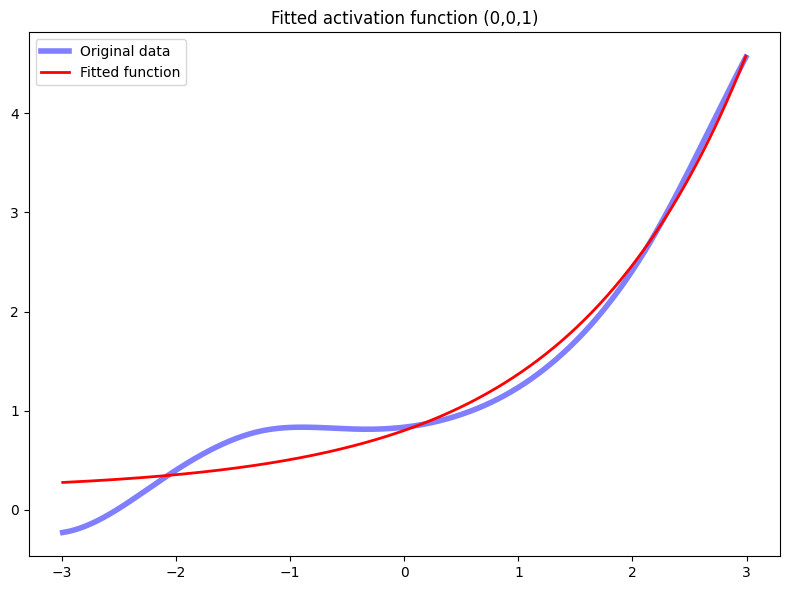

2025-03-11 04:56:34,888 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,2)


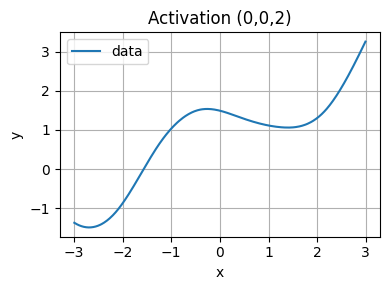

2025-03-11 04:56:34,959 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,2)
2025-03-11 04:56:34,960 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 2.5325317525141653, for constant: [0.74723428]
2025-03-11 04:56:34,960 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 04:56:39,000 - LLMSR.llmSR - WARNING - Function conversion failed: invalid syntax (<string>, line 1)
2025-03-11 04:56:40,775 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 04:56:40,776 - LLMSR.llmSR - INFO - Initial population best: score=-198.6541016537318, params=[0.77565487 0.586074  ], ansatz: params[0] + params[1] * x...
2025-03-11 04:56:40,776 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 04:56:54,246 - LLMSR.llmSR - INFO - Generation 1 best: score=-9.307944581258642, params=[ 1.17942161  0.57803557 -0.13152773], ansatz: params[0] + params[1] * x + params[2] * 


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 2
  Success rate: 98.04%

Breakdown by processing stage:
  Api Call: 102 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 101 succeeded, 1 failed (99.02% success)
  Function Conversion: 100 succeeded, 1 failed (99.01% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 1
  Function Errors:
    - syntax error: 1
Approximation for (0,0,2): params[0] + params[1] * np.sin(x) + params[2] * np.cos(x) + params[3] * x**2 + params[4] * np.sin(params[5] * x), with parameters [ -0.377 -65.37    1.927   0.359  65.895   0.989]


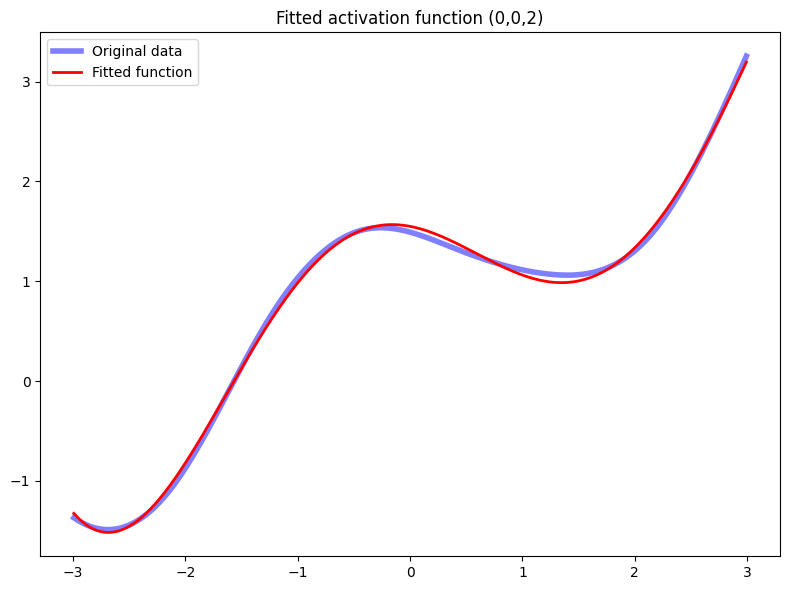

2025-03-11 04:57:26,107 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


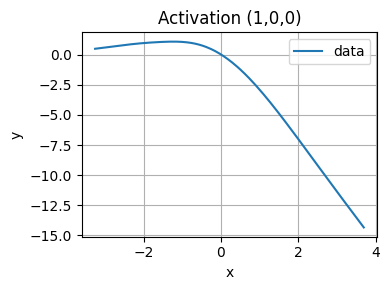

2025-03-11 04:57:26,172 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-11 04:57:26,173 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 232.15553142489387, for constant: [-0.19507876]
2025-03-11 04:57:26,173 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 04:57:28,562 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 04:57:28,562 - LLMSR.llmSR - INFO - Initial population best: score=-4.370407074627616, params=[-0.41809729 -1.96195977 -0.55578593], ansatz: params[0] + params[1] * x + params[2] * x**2...
2025-03-11 04:57:28,563 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 04:57:31,987 - LLMSR.llmSR - INFO - Generation 1 best: score=-51.6724183467823, params=[-0.36658059 -1.89195779 -0.56390292 -0.00992489], ansatz: params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3...
2025-03-11 04:57:31,988 - LLMSR.llmSR - 


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 5
  Success rate: 95.24%

Breakdown by processing stage:
  Api Call: 105 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 5 failed (95.24% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 5
Approximation for (1,0,0): params[0] * np.cos(params[1] * x) + params[2] * x**2 + params[3] * x + params[4], with parameters [ 0.571  1.33  -0.491 -1.989 -0.557]


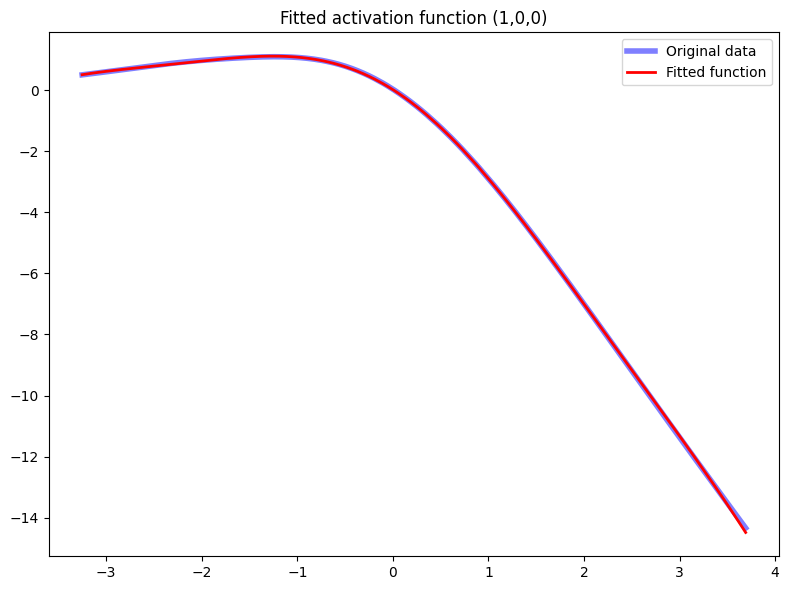

2025-03-11 04:58:08,885 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


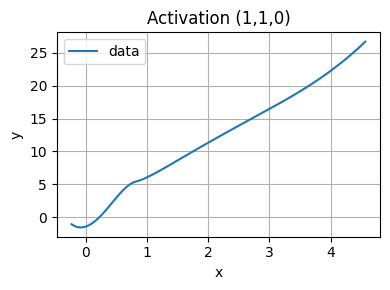

2025-03-11 04:58:08,950 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-11 04:58:08,950 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.7828888111397614, for constant: [7.22242571]
2025-03-11 04:58:08,951 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 04:58:14,263 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 04:58:14,264 - LLMSR.llmSR - INFO - Initial population best: score=-1754.8296530940206, params=[0.10086529 5.63634535], ansatz: params[0] + params[1] * x...
2025-03-11 04:58:14,265 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
<string>:1: RuntimeWarning: invalid value encountered in power
2025-03-11 04:58:17,463 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.7868346832509953, params=[ 0.95896083 -3.92893081  7.15655582], ansatz: params[0] * np.sin(params[1] * x) + params[2]...
2025-03-11 04:58:17,464 - LLMSR.llmSR 


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 100 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 0 failed (100.00% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
Approximation for (1,1,0): params[0] * np.sin(params[1] * x) + params[2], with parameters [ 0.959 -3.929  7.157]


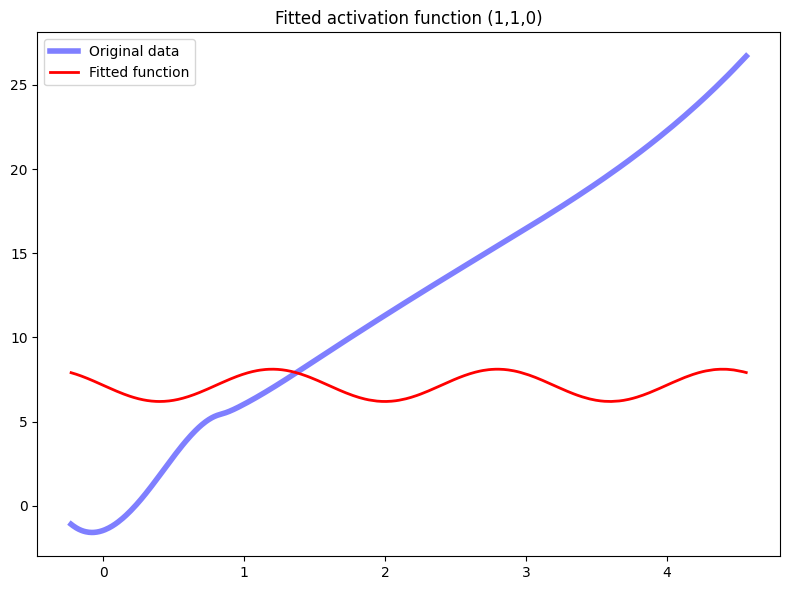

2025-03-11 04:58:49,860 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,2,0)


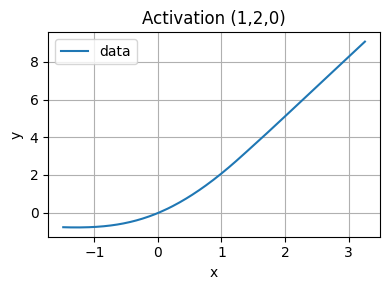

2025-03-11 04:58:49,927 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,2,0)
2025-03-11 04:58:49,927 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.975446497656614, for constant: [2.22472011]
2025-03-11 04:58:49,928 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 04:58:54,474 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 04:58:54,475 - LLMSR.llmSR - INFO - Initial population best: score=-171.24679883294215, params=[1.75555007 0.91291291], ansatz: params[0] * x + params[1]...
2025-03-11 04:58:54,475 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 04:58:59,470 - LLMSR.llmSR - INFO - Generation 1 best: score=-61.15688704033624, params=[0.25955719 1.43734462 0.45179429], ansatz: params[0] + params[1] * x + params[2] * x**2...
2025-03-11 04:58:59,472 - LLMSR.llmSR - INFO - Generation 2/9: Generating 10 new individuals. Async? True, 


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 1
  Success rate: 99.01%

Breakdown by processing stage:
  Api Call: 101 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 1 failed (99.01% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 1
Approximation for (1,2,0): params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3], with parameters [-0.076  0.626  1.579 -0.004]


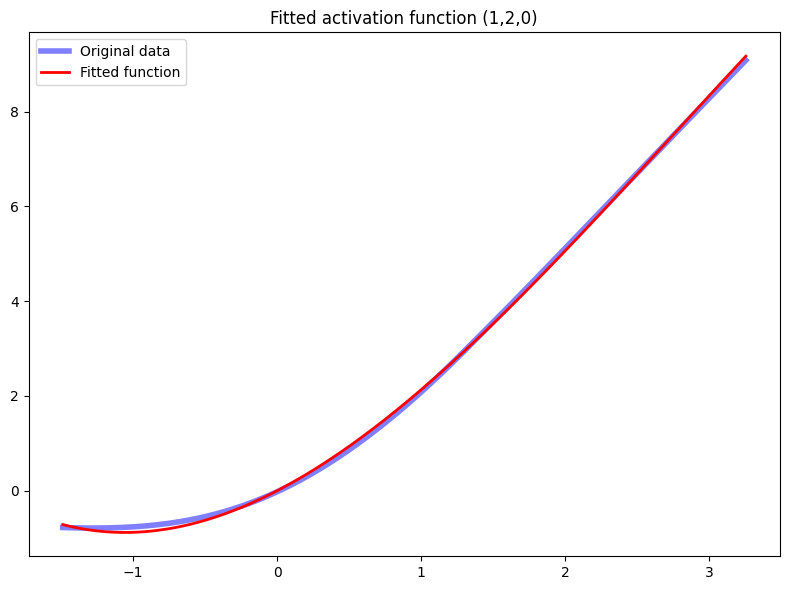

2025-03-11 04:59:27,436 - LLMSR.llmSR - INFO - KAN conversion complete: 6 total connections
2025-03-11 04:59:27,436 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 6 processed


Approximation for (0, 0, 0): params[0] * x**3 + params[1] * np.sin(x) + params[2] * x + params[3] * np.cos(x) + params[4]
Parameters are [-0.   1.9 -0.9 -1.3 -1.2]
Approximation for (0, 0, 1): params[0] * np.exp(params[1] * x) + params[2]
Parameters are [0.6 0.7 0.2]
Approximation for (0, 0, 2): params[0] + params[1] * np.sin(x) + params[2] * np.cos(x) + params[3] * x**2 + params[4] * np.sin(params[5] * x)
Parameters are [ -0.4 -65.4   1.9   0.4  65.9   1. ]
Approximation for (1, 0, 0): params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3 + params[4] * np.cos(x)
Parameters are [-1.1 -2.  -0.4 -0.   1.1]
Approximation for (1, 1, 0): params[0] * np.sin(params[1] * x) + params[2]
Parameters are [ 1.  -3.9  7.2]
Approximation for (1, 2, 0): params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]
Parameters are [-0.1  0.6  1.6 -0. ]
Final training loss: 0.0006186272366903722


In [13]:
res = LLMSR.kan_to_symbolic(pruned_model, client, gpt_model="openai/gpt-4o", exit_condition=min(train_loss).item(), generations=10)
symb_expr_sorted = kan_sr.sort_symb_expr(res)

print(f"Final training loss: {train_loss[-1]}")


## Extract symbolic expressions from the trained KAN model

Now that we have a trained model, we can extract symbolic expressions from it.

In [16]:
# Reimport kan_sr module to get the latest version
import importlib
import LLMSR.kan_sr as kan_sr
importlib.reload(kan_sr)
from LLMSR.kan_sr import build_expression_tree
from LLMSR.kan_sr import run_complete_pipeline


In [88]:
# type(node_data['full_expression'][0])
# import sympy as sp
# from sympy import symbols, simplify

In [16]:


# build expression tree
node_data = LLMSR.kan_sr.build_expression_tree(pruned_model, symb_expr_sorted, top_k=3)
print(node_data['full_expressions'])

KAN Connection: (0, 0, 0), Best Expression: -0.0253 * x**3 + 1.8821 * np.sin(1. * x) + -0.9459 * x + -1.3409 * np.cos(1. * x) + -1.1713, Score: -0.13224
KAN Connection: (0, 0, 1), Best Expression: 0.6095 * np.exp(0.6592 * x) + 0.1909, Score: -0.31797
KAN Connection: (0, 0, 2), Best Expression: -0.3766 + -65.3701 * np.sin(1. * x) + 1.9268 * np.cos(1. * x) + 0.3591 * x**2 + 65.8951 * np.sin(0.9888 * x), Score: -0.00308
KAN Connection: (1, 0, 0), Best Expression: 0.5714 * np.cos(1.3295 * x) + -0.4910 * x**2 + -1.9891 * x + -0.5571, Score: -0.00231
KAN Connection: (1, 1, 0), Best Expression: 0.9590 * np.sin(-3.9289 * x) + 7.1566, Score: -0.78683
KAN Connection: (1, 2, 0), Best Expression: -0.0756 * x**3 + 0.6261 * x**2 + 1.5794 * x + -0.0038, Score: -0.07642
['0.05032423*x0**3 + 0.56716254*x0**2 + 1.88148969*x0 - 21631.2272396382*(0.00544957060540162*x0**2 + sin(0.9888*x0) - 0.992032791512571*sin(1.0*x0) + 0.0292404139306261*cos(1.0*x0) - 0.00571514422164926)**3 + 2718.62900813066*(0.00544

In [ ]:
# # Run the complete pipeline with custom parameters
# results = kan_sr.run_complete_pipeline(
#     client, f,
#     ranges=x_range,
#     width=[1, 4, 1],  # Use a wider network for this more complex function
#     grid=7,
#     k=3,
#     train_steps=500,  # More training steps
#     gpt_model="openai/gpt-4o",
#     node_th=0.1,      # More conservative pruning
#     edge_th=0.1,
#     custom_system_prompt_for_second_simplification=system_prompt_for_second_simplification,
#     generations = 3,
#     population=10
# )


## Optimize and simplify the expression

Now we'll optimize the parameters of the expression and use SymPy and the LLM to simplify it.

In [67]:
# `
# `

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.14e+00 | test_loss: 1.42e+00 | reg: 1.69e+02 | : 100%|█| 40/40 [00:28<00:00,  1.39it


saving model version 0.1
saving model version 0.2
Trained model:


2025-03-11 03:47:38,673 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-11 03:47:38,673 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


Pruned model:


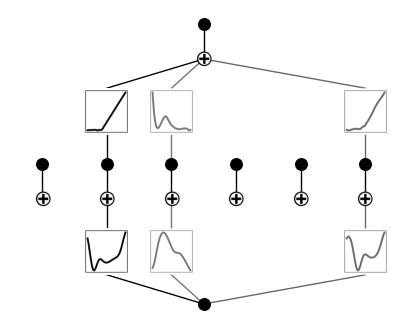

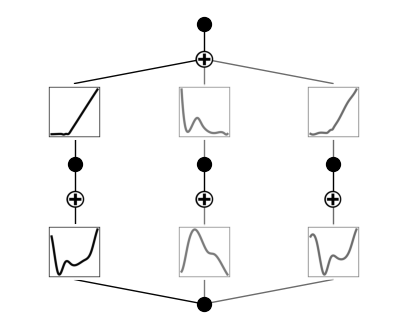

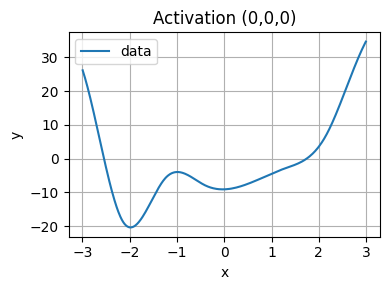

2025-03-11 03:47:39,123 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-11 03:47:39,123 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 66.09579171660624, for constant: [-1.48510375]
2025-03-11 03:47:39,124 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 03:47:40,956 - LLMSR.llmSR - WARNING - Function conversion failed: invalid syntax (<string>, line 1)
2025-03-11 03:47:43,098 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 03:47:43,099 - LLMSR.llmSR - INFO - Initial population best: score=-6119.816443455297, params=[ 3.162389   -1.33174946], ansatz: params[0] * x + params[1]...
2025-03-11 03:47:43,099 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 03:47:45,718 - LLMSR.llmSR - INFO - Generation 1 best: score=-141.25925252027744, params=[ -0.12151726   3.17875507   4.01359732 -11.0990152 ], ansatz: params[0] * x**3 + pa


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 1
  Success rate: 96.77%

Breakdown by processing stage:
  Api Call: 31 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 31 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 1 failed (96.77% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
  Function Errors:
    - syntax error: 1
Approximation for (0,0,0): params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3], with parameters [ -0.122   3.179   4.014 -11.099]


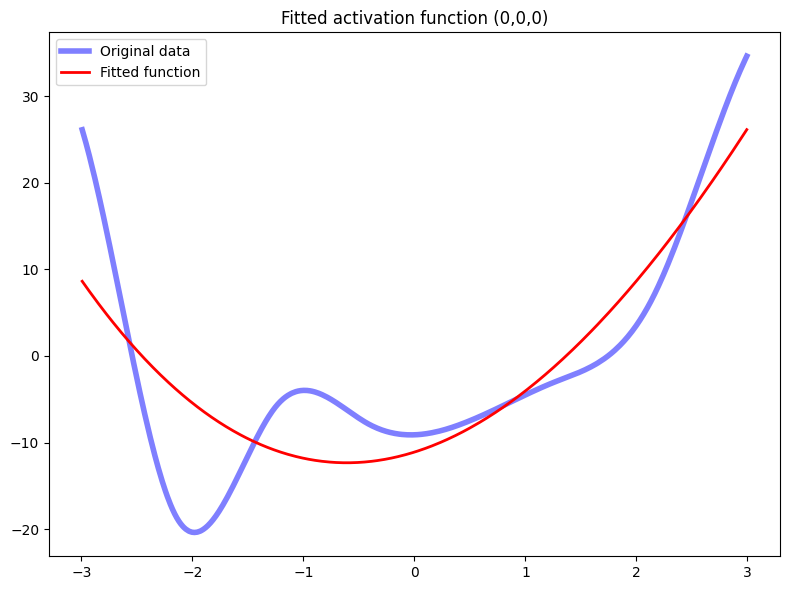

2025-03-11 03:47:51,558 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


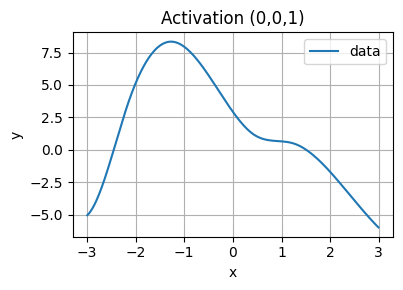

2025-03-11 03:47:51,631 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-11 03:47:51,632 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 6.611520549510079, for constant: [1.63142784]
2025-03-11 03:47:51,632 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 03:47:56,385 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 03:47:56,386 - LLMSR.llmSR - INFO - Initial population best: score=-13.999287541801442, params=[-1.14551351  1.57587825], ansatz: params[0] * x + params[1]...
2025-03-11 03:47:56,387 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 03:47:59,199 - LLMSR.llmSR - INFO - Generation 1 best: score=-2.9197036392220053, params=[-4.14744962e+00  1.08726867e+00  5.98479451e+00 -4.40204282e-04
 -1.04679639e+00 -1.17356933e+00], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.cos(params[3] * x) + params[4] * x**2


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 30 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
Approximation for (0,0,1): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3], with parameters [-4.147  1.087 -1.047  4.811]


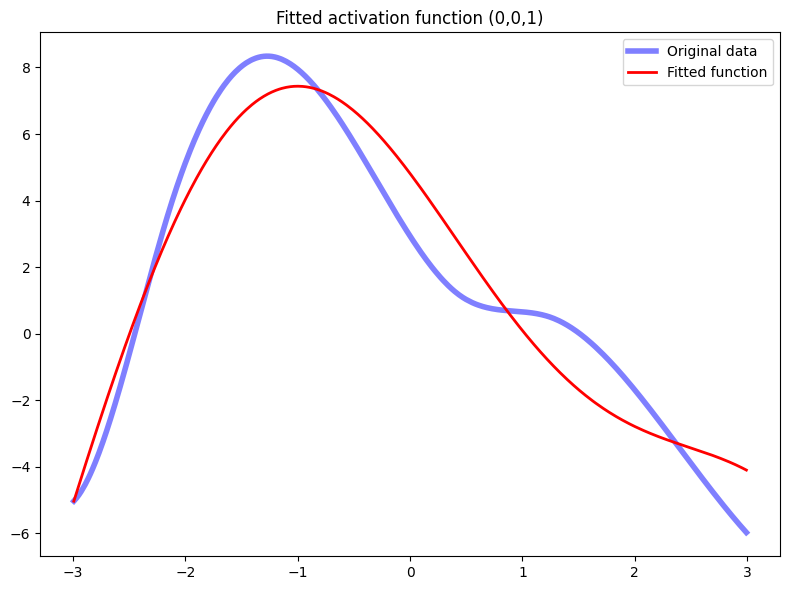

2025-03-11 03:48:24,058 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,2)


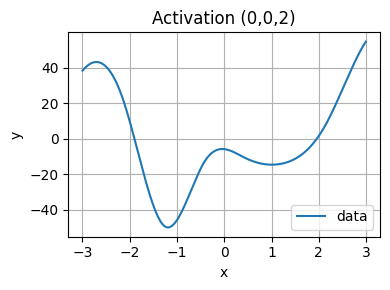

2025-03-11 03:48:24,126 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,2)
2025-03-11 03:48:24,127 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 576.3887841123817, for constant: [-1.15315392]
2025-03-11 03:48:24,127 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 03:48:31,631 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 03:48:31,632 - LLMSR.llmSR - INFO - Initial population best: score=-6093.752733213146, params=[-1.1622623  12.5804626   1.51527447], ansatz: params[0] + params[1] * np.sin(params[2] * x)...
2025-03-11 03:48:31,633 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 03:48:34,150 - LLMSR.llmSR - INFO - Generation 1 best: score=-inf, params=[1. 1. 1. 1. 1.], ansatz: params[0] + params[1] * np.sin(params[2] * x) + params[3] * np.cos(params[4] * x)...
2025-03-11 03:48:34,150 - LLMSR.llmSR - ERROR - Error in genetic alg

zero-size array to reduction operation minimum which has no identity


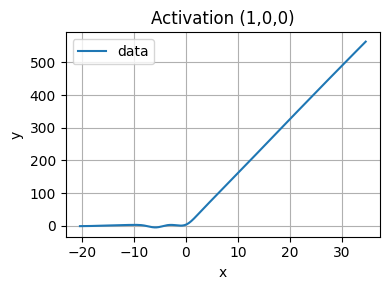

2025-03-11 03:48:34,217 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-11 03:48:34,218 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 3.994173036701027, for constant: [66.75165916]
2025-03-11 03:48:34,218 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 03:48:37,129 - LLMSR.llmSR - WARNING - Function conversion failed: invalid syntax (<string>, line 1)
2025-03-11 03:48:40,771 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 03:48:40,772 - LLMSR.llmSR - INFO - Initial population best: score=-122.80826700606548, params=[81.69095351 10.059428  ], ansatz: params[0] + params[1] * x...
2025-03-11 03:48:40,772 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 03:48:43,373 - LLMSR.llmSR - INFO - Generation 1 best: score=-2.3200006899843273, params=[40.535778    4.30361652  0.38758367], ansatz: params[0] + params[1] * x + params[2


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 1
  Success rate: 96.77%

Breakdown by processing stage:
  Api Call: 31 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 31 succeeded, 0 failed (100.00% success)
  Function Conversion: 30 succeeded, 1 failed (96.77% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
  Function Errors:
    - syntax error: 1
Approximation for (1,0,0): params[0] + params[1] * x + params[2] * np.heaviside(x, 0) * (x ** 2), with parameters [40.536  4.304  0.388]


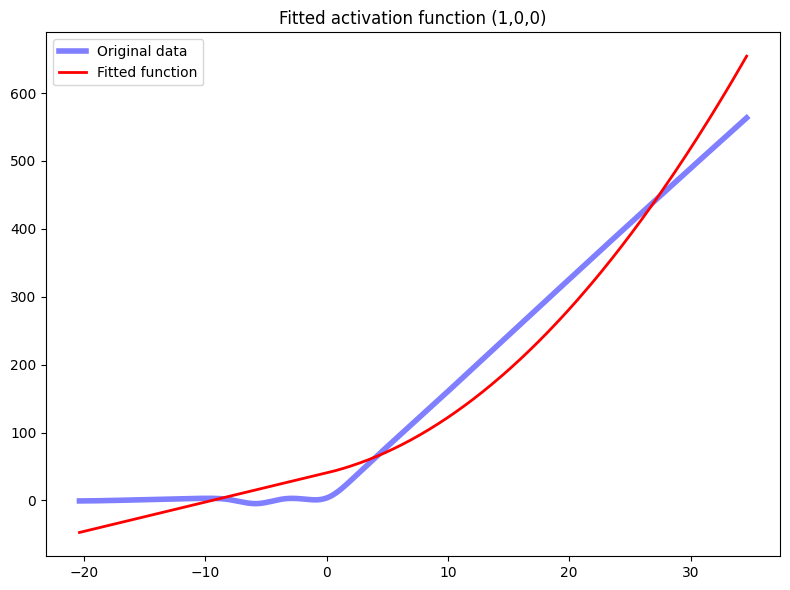

2025-03-11 03:48:52,523 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


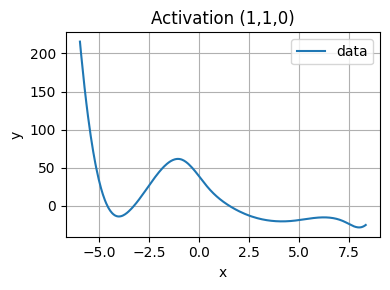

2025-03-11 03:48:52,588 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-11 03:48:52,589 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 20.481551466395818, for constant: [7.80862697]
2025-03-11 03:48:52,589 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 03:48:57,038 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 03:48:57,039 - LLMSR.llmSR - INFO - Initial population best: score=-473.1041185577941, params=[-5.61966495 16.97670485], ansatz: params[0] * x + params[1]...
2025-03-11 03:48:57,040 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 03:48:58,572 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with that request.'
<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: overflow encountered in multiply
2025-03-11 03:49:05,796 -


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 2
  Success rate: 93.75%

Breakdown by processing stage:
  Api Call: 32 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 30 succeeded, 2 failed (93.75% success)
  Function Conversion: 30 succeeded, 0 failed (100.00% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 2
Approximation for (1,1,0): params[0] + params[1] * x + params[2] * np.cos(x) + params[3] * np.exp(-params[4] * x**2) + params[5] * x**2, with parameters [-29.158  -7.524  19.763  51.17    0.062   1.028]


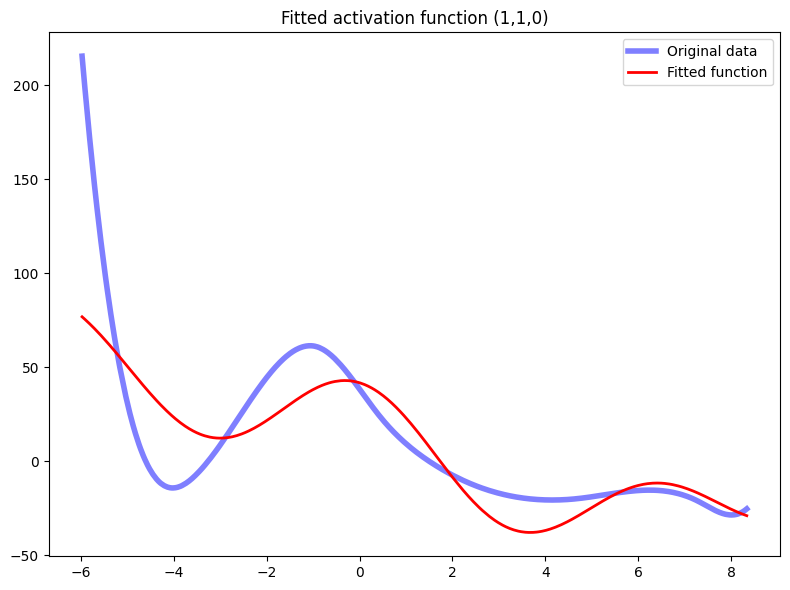

2025-03-11 03:49:10,306 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,2,0)


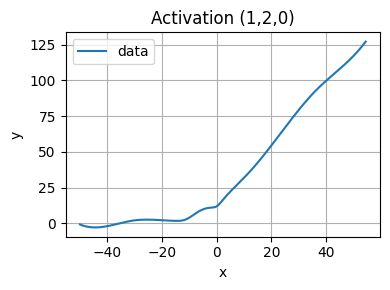

2025-03-11 03:49:10,372 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,2,0)
2025-03-11 03:49:10,372 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 1.792941315894344, for constant: [30.06195919]
2025-03-11 03:49:10,373 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 03:49:12,417 - LLMSR.llmSR - WARNING - Function conversion failed: invalid syntax (<string>, line 1)
2025-03-11 03:49:21,194 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 03:49:21,194 - LLMSR.llmSR - INFO - Initial population best: score=-1.489853887807328, params=[31.60907419  1.34163787], ansatz: params[0] + params[1] * x...
2025-03-11 03:49:21,195 - LLMSR.llmSR - INFO - Generation 1/2: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 03:49:25,751 - LLMSR.llmSR - INFO - Generation 1 best: score=-13.843783680234601, params=[17.26131524  1.26494146  0.01857186], ansatz: params[0] + params[1] * x + params[2]


API Call Statistics:
  Successful calls (end-to-end): 30
  Failed calls: 2
  Success rate: 93.75%

Breakdown by processing stage:
  Api Call: 32 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 31 succeeded, 1 failed (96.88% success)
  Function Conversion: 30 succeeded, 1 failed (96.77% success)
  Curve Fitting: 30 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 1
  Function Errors:
    - syntax error: 1
Approximation for (1,2,0): params[0] + params[1] * x, with parameters [31.609  1.342]


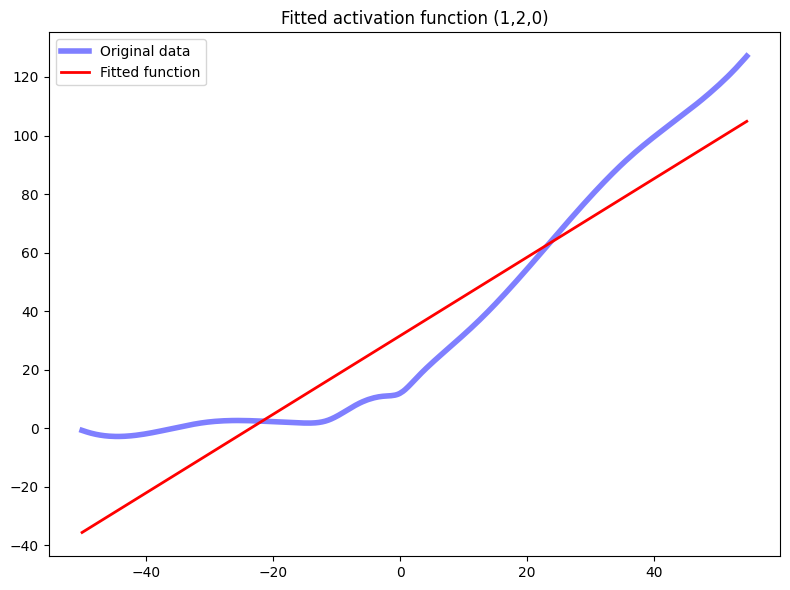

2025-03-11 03:49:29,884 - LLMSR.llmSR - INFO - KAN conversion complete: 6 total connections
2025-03-11 03:49:29,885 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 6 processed


Approximation for (0, 0, 0): params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]
Parameters are [ -0.1   3.2   4.  -11.1]
Approximation for (0, 0, 1): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3]
Parameters are [-4.1  1.1 -1.   4.8]
Approximation for (0, 0, 2): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3]
Parameters are [-4.1  1.1 -1.   4.8]
Approximation for (1, 0, 0): params[0] + params[1] * x + params[2] * np.heaviside(x, 0) * (x ** 2)
Parameters are [40.5  4.3  0.4]
Approximation for (1, 1, 0): params[0] + params[1] * x + params[2] * np.cos(x) + params[3] * np.exp(-params[4] * x**2) + params[5] * x**2
Parameters are [-29.2  -7.5  19.8  51.2   0.1   1. ]
Approximation for (1, 2, 0): params[0] + params[1] * x
Parameters are [31.6  1.3]
KAN Connection: (0, 0, 0), Best Expression: -0.1215 * x**3 + 3.1788 * x**2 + 4.0136 * x + -11.0990, Score: -141.25925
KAN Connection: (0, 0, 1), Best Expression: -4.1474 * np.sin(1.0873 * x) + -1.0468

NameError: name 'heaviside' is not defined

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f2,
    ranges=x_range2,
    width=[1, 6, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=40,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=system_prompt_for_second_simplification,
    generations = 3,
    population=10
)

# Print the final expressions
print(f"Raw expression: {results['result']['raw_expression']}")
print(f"SymPy simplified: {results['result']['simplified_expression']}")
print(f"LLM simplified: {results['result']['llm_simplified']}")
print(f"Chi-squared: {results['result']['chi_squared']}")

In [21]:
# x_data

array([-0.02246046,  1.6093307 , -2.4691353 , ..., -1.4862621 ,
       -0.6009884 ,  2.8812103 ], shape=(10000,), dtype=float32)

###################################################
Simplifying output 0
KAN expression (raw):
 0.05032423*x0**3 + 0.56716254*x0**2 + 1.88148969*x0 - 21631.2272396382*(0.00544957060540162*x0**2 + sin(0.9888*x0) - 0.992032791512571*sin(1.0*x0) + 0.0292404139306261*cos(1.0*x0) - 0.00571514422164926)**3 + 2718.62900813066*(0.00544957060540162*x0**2 + sin(0.9888*x0) - 0.992032791512571*sin(1.0*x0) + 0.0292404139306261*cos(1.0*x0) - 0.00571514422164926)**2 - 1.73926950131*(0.0134424313267095*x0**3 + 0.502576908772116*x0 - sin(1.0*x0) + 0.712448860315605*cos(1.0*x0) + 0.622336751500983)**2 + 104.07472094*sin(0.9888*x0) - 106.98922105*sin(1.0*x0) - 0.959*sin(2.39466455*exp(0.6592*x0) + 0.75002701) + 5.71037211*cos(1.0*x0) + 0.5714*cos(0.03363635*x0**3 + 1.25757405*x0 - 2.50225195*sin(1.0*x0) + 1.78272655*cos(1.0*x0) + 1.55724335) + 8.33073079
KAN expression (simplified):
 0.0503*x0**3 + 0.5672*x0**2 + 1.8815*x0 - 21631.2272*(0.0054*x0**2 + sin(0.9888*x0) - 0.992*sin(1.0*x0) + 0.0292*cos(1.0*x

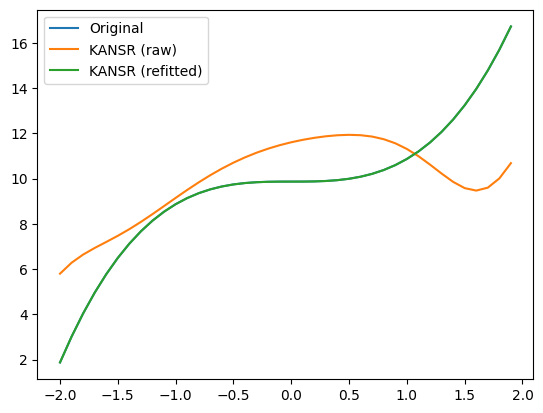

##################
# Final formula: #
##################
 To simplify the given expression, we'll break it down step-by-step, focusing on combining like terms and factoring where applicable.

### Original Function:
\[ 
f(x_0) = 1.0001x_0^3 + 0.0004x_0^2 - 0.0015x_0 - 0.0217839770191286(g(x_0))^3 + 0.170782556272(g(x_0))^2 + 0.006861358368(h(x_0))^2 \\
+ 0.0126000000000062 \sin(0.92x_0) + 0.0391 \cos(0.92x_0) + 9.6676 
\]

Where:
\[
g(x_0) = 0.0429447852760757 \sin(0.92 x_0) + 0.0920245398773006 \cos(0.92 x_0) - 1.0 
\]

\[
h(x_0) = 0.000870723212456464x_0^3 + 0.034419176398279x_0 - 0.512190124974391 \sin(0.92 x_0) + 0.237707437000615 \cos(0.92 x_0) - 1.0 
\]

### Simplification Steps:

1. **Simplify Trigonometric Components**:
   - Combine sin and cos terms inside \( g(x_0) \) and \( h(x_0) \) to potentially identify simplifications.
   
2. **Identify Patterns**:
   - Look for patterns or trigonometric identities (e.g., combined sin-cos can sometimes be represented as a single trigonom

In [18]:
# Convert training data to numpy arrays for optimization
x_data = dataset['train_input'].cpu().numpy().flatten()
y_data = dataset['train_label'].cpu().numpy().flatten()

# Optimize and simplify the expression
best_expression, result_dict = kan_sr.optimize_expression(
    client, node_data, 'gpt-4o', x_data, y_data, 
    custom_system_prompt=None, original_f = f, KAN_model = pruned_model
)

# Print the results
best_index = result_dict['best_expression_index']
print(f"best expression: {result_dict['best_expression']}, at index {best_index}, with chi^2 {result_dict['best_chi_squared']}")
print(f"initially: {result_dict['raw_expressions'][best_index]}")
print(f"then simplified: {result_dict['simplified_expressions'][best_index]}, chi^2 {result_dict['chi_squared_simplified'][best_index]}")
print(f"then refitted: {result_dict['final_expressions'][best_index]}, chi^2 {result_dict['chi_squared_finals'][best_index]}")

Error plotting simplified expression: 'simplified_expression'
Error plotting LLM simplified expression: 'llm_simplified'


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

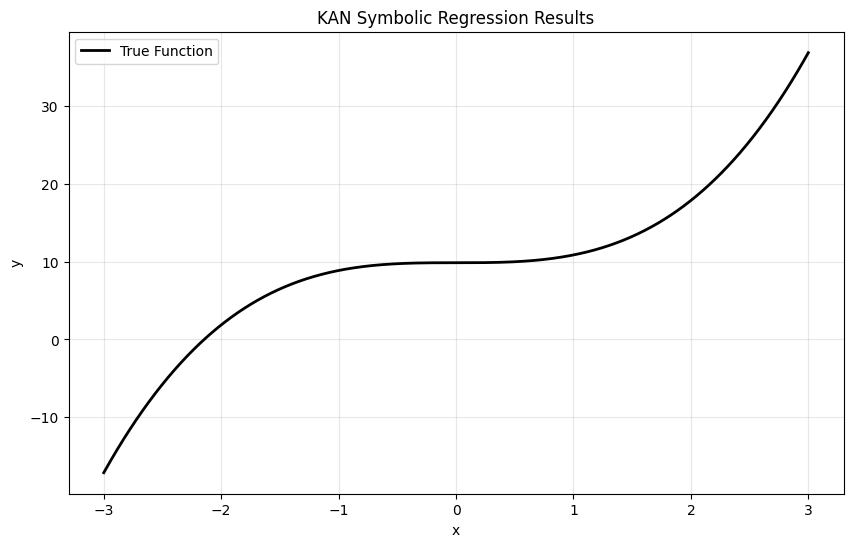

In [20]:
kan_sr.plot_results(f, x_range, result_dict, title="KAN Symbolic Regression Results")

## Example 2: More Complex Function

Now let's try a more complex function to showcase the power of KAN symbolic regression.

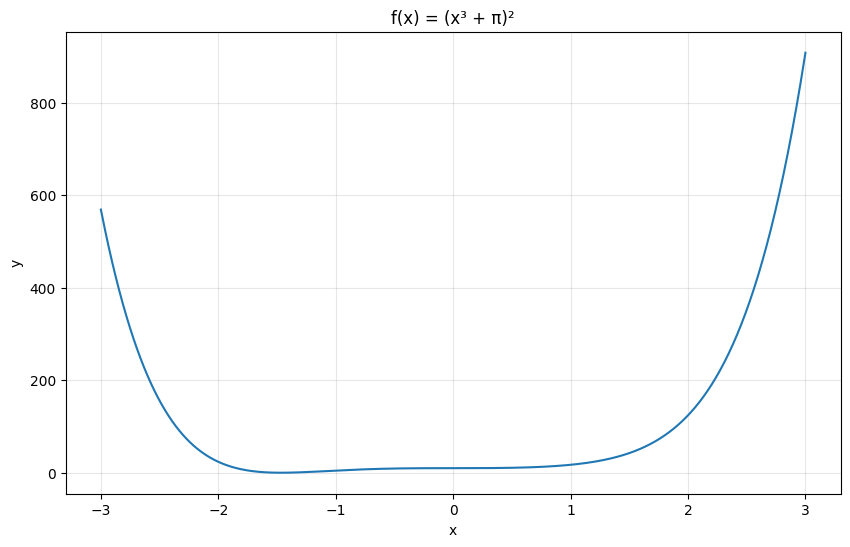

In [7]:
# Define a more complex target function: f(x) = (x³ + π)²
def target_function2(x):
    return (x**3 + np.pi)**2

# Define the function as a PyTorch function
def f2(x):
    return (x**3 + torch.pi)**2

# Plot the function
x_range2 = (-3, 3)
x = np.linspace(x_range2[0], x_range2[1], 1000)
y = target_function2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = (x³ + π)²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

## Running the Complete Pipeline

For this example, we'll use the complete pipeline function that combines all steps:

In [8]:
import importlib
import LLMSR.kan_sr as kan_sr
import LLMSR.llmSR as llmsr
importlib.reload(kan_sr)
importlib.reload(llmsr)


<module 'LLMSR.llmSR' from '/Users/kit/Documents/Phys_Working/LLM_SR/Examples/../LLMSR/llmSR.py'>

In [9]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f2,
    ranges=x_range2,
    width=[1, 6, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=40,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=system_prompt_for_second_simplification,
    generations = 3,
    population=10
)

# Print the final expressions
print(f"Raw expression: {results['result']['raw_expression']}")
print(f"SymPy simplified: {results['result']['simplified_expression']}")
print(f"LLM simplified: {results['result']['llm_simplified']}")
print(f"Chi-squared: {results['result']['chi_squared']}")

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/40 [00:00<?, ?it/s]

| train_loss: 4.13e+00 | test_loss: 4.22e+00 | reg: 0.00e+00 | :  12%|▏| 5/40 [00:03<00:27,  1.29it/


KeyboardInterrupt: 

## Custom Example: Define Your Own Function

Now you can try your own function! Define a custom function below and run the pipeline.

In [ ]:
# Define your own target function
def custom_target_function(x):
    # Replace this with your own function
    return np.sin(x) * np.exp(-0.1 * x**2)

# Define the function as a PyTorch function
def custom_f(x):
    # Replace this with your own function
    return torch.sin(x) * torch.exp(-0.1 * x**2)

# Choose a suitable x range
custom_x_range = (-5, 5)

# Plot the function
x = np.linspace(custom_x_range[0], custom_x_range[1], 1000)
y = custom_target_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Custom Function: sin(x) * exp(-0.1 * x²)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run the pipeline on your custom function
custom_results = kan_sr.run_complete_pipeline(
    client, custom_f,
    x_range=custom_x_range,
    width=[1, 8, 1],  # Use a wider network for complex functions
    grid=8,
    k=4,
    train_steps=150,  # More training steps for better results
    gpt_model=gpt_model,
    node_th=0.1,  
    edge_th=0.1,
    custom_system_prompt=system_prompt
)

# Print the final expressions
print(f"Raw expression: {custom_results['result']['raw_expression']}")
print(f"SymPy simplified: {custom_results['result']['simplified_expression']}")
print(f"LLM simplified: {custom_results['result']['llm_simplified']}")
print(f"Chi-squared: {custom_results['result']['chi_squared']}")

In [ ]:
# Plot the results for your custom function
fig, ax = kan_sr.plot_results(
    custom_f, custom_x_range, custom_results['result'], 
    title="KAN Symbolic Regression: Custom Function"
)
plt.show()

## Experiment with Different Parameters

You can experiment with different model parameters to see how they affect the results.

In [ ]:
# Define different model configurations
configs = [
    {
        'name': 'Small Network',
        'width': [1, 4, 1],
        'grid': 5,
        'k': 3,
        'train_steps': 50
    },
    {
        'name': 'Medium Network',
        'width': [1, 8, 1],
        'grid': 7,
        'k': 3,
        'train_steps': 100
    },
    {
        'name': 'Deep Network',
        'width': [1, 4, 4, 1],
        'grid': 6,
        'k': 3,
        'train_steps': 150
    }
]

# Choose one config to run (change the index to try different configs)
config_idx = 0
config = configs[config_idx]

print(f"Running with configuration: {config['name']}")
print(f"Network width: {config['width']}")
print(f"Grid size: {config['grid']}")
print(f"Basis functions: {config['k']}")
print(f"Training steps: {config['train_steps']}")

In [ ]:
# Run the pipeline with the selected configuration
# You can use one of the previous functions or define a new one
experiment_results = kan_sr.run_complete_pipeline(
    client, f,  # Using the first example function
    x_range=x_range,
    width=config['width'],
    grid=config['grid'],
    k=config['k'],
    train_steps=config['train_steps'],
    gpt_model=gpt_model,
    node_th=0.1,
    edge_th=0.1,
    custom_system_prompt=system_prompt
)

# Print the final expressions
print(f"Raw expression: {experiment_results['result']['raw_expression']}")
print(f"SymPy simplified: {experiment_results['result']['simplified_expression']}")
print(f"LLM simplified: {experiment_results['result']['llm_simplified']}")
print(f"Chi-squared: {experiment_results['result']['chi_squared']}")

In [ ]:
# Plot the results
fig, ax = kan_sr.plot_results(
    f, x_range, experiment_results['result'], 
    title=f"KAN Symbolic Regression with {config['name']}"
)
plt.show()

cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.71e-04 | test_loss: 5.58e-04 | reg: 1.09e+01 | : 100%|█| 100/100 [00:26<00:00,  3.81


saving model version 0.1
saving model version 0.2
Trained model:
Pruned model:


2025-03-11 06:14:34,417 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-11 06:14:34,418 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


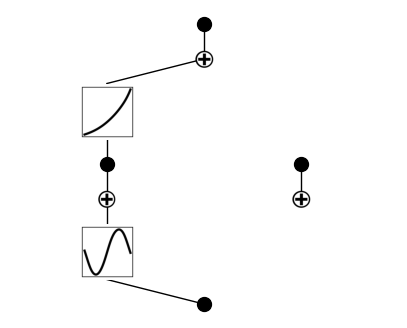

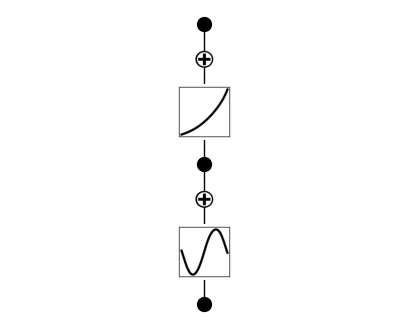

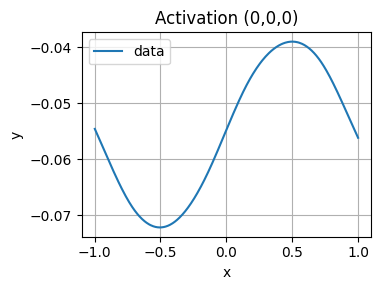

2025-03-11 06:14:34,633 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-11 06:14:34,634 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.04477817389760193, for constant: [-0.05546036]
2025-03-11 06:14:34,634 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 06:14:36,816 - LLMSR.llmSR - INFO - Generated 3 individuals asynchronously
2025-03-11 06:14:36,816 - LLMSR.llmSR - INFO - Initial population best: score=-2.7112258594452435e-05, params=[-0.01679901 -3.19022947 -0.01757019 -0.05528745], ansatz: params[0] * np.sin(params[1] * x + params[2]) + params[3]...
2025-03-11 06:14:36,817 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-11 06:14:36,817 - LLMSR.llmSR - INFO - Successfully found expression for connection (0,0,0)


Approximation for (0,0,0): params[0] * np.sin(params[1] * x + params[2]) + params[3], with parameters [-0.017 -3.19  -0.018 -0.055]


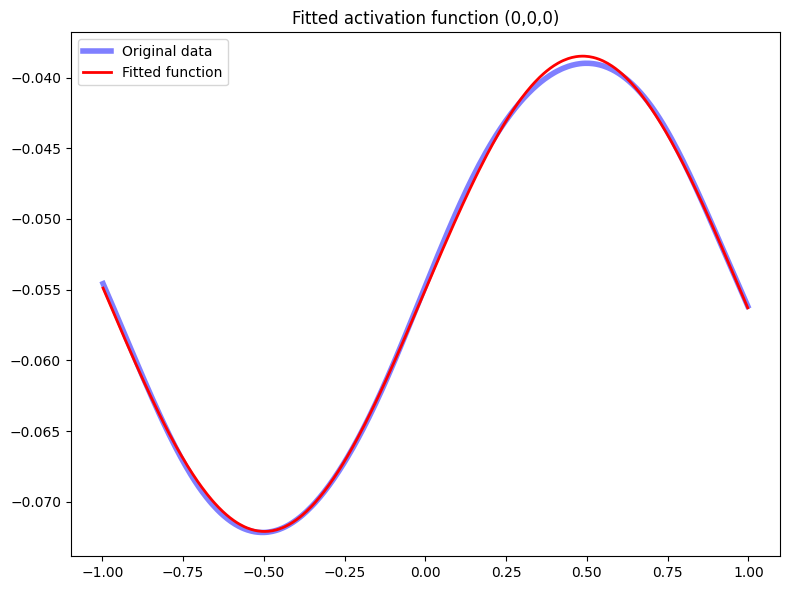

2025-03-11 06:14:36,895 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


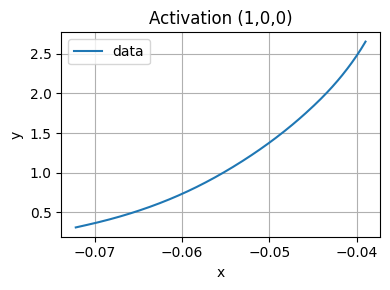

2025-03-11 06:14:36,962 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-11 06:14:36,963 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.4422754445729814, for constant: [1.22289276]
2025-03-11 06:14:36,963 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 06:14:39,765 - LLMSR.llmSR - INFO - Generated 3 individuals asynchronously
2025-03-11 06:14:39,766 - LLMSR.llmSR - INFO - Initial population best: score=-4.296737746861407e-05, params=[23.83314929 55.29746757 -0.13245175], ansatz: params[0] * np.exp(params[1] * x) + params[2]...
2025-03-11 06:14:39,766 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-11 06:14:39,767 - LLMSR.llmSR - INFO - Successfully found expression for connection (1,0,0)


Approximation for (1,0,0): params[0] * np.exp(params[1] * x) + params[2], with parameters [23.833 55.297 -0.132]


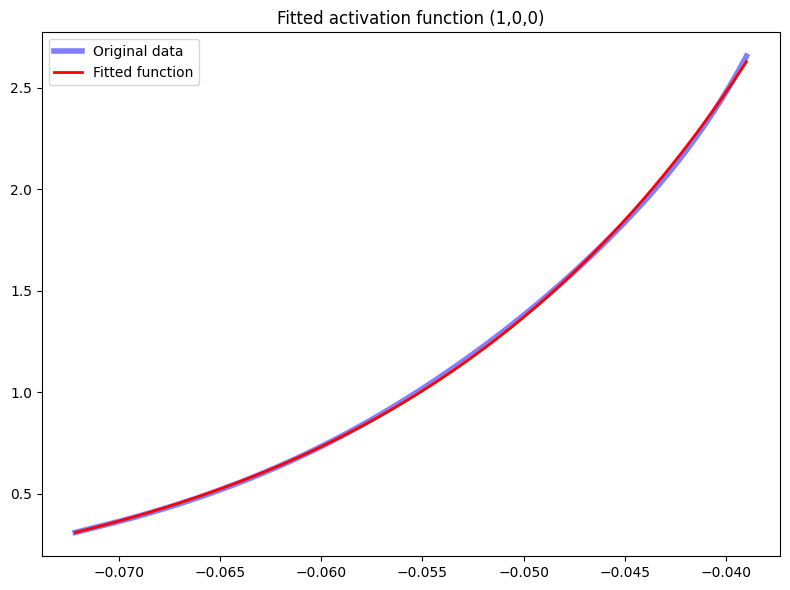

2025-03-11 06:14:39,853 - LLMSR.llmSR - INFO - KAN conversion complete: 2 total connections
2025-03-11 06:14:39,853 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 2 processed


Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x + params[2]) + params[3]
Parameters are [-0.  -3.2 -0.  -0.1]
Approximation for (1, 0, 0): params[0] * np.exp(params[1] * x) + params[2]
Parameters are [23.8 55.3 -0.1]
KAN Connection: (0, 0, 0), Best Expression: -0.0168 * np.sin(-3.1902 * x + -0.0176) + -0.0553, Score: -0.00003
KAN Connection: (1, 0, 0), Best Expression: 23.8331 * np.exp(55.2975 * x) + -0.1325, Score: -0.00004
###################################################
Simplifying output 0
KAN expression (raw):
 1.1197703512704*exp(0.928998*sin(3.1902*x0 + 0.0176)) - 0.1325
Original function 'f' not defined; skipping original plot sin(): argument 'input' (position 1) must be Tensor, not numpy.float64
KAN expression (simplified):
 1.1198*exp(0.929*sin(3.1902*x0 + 0.0176)) - 0.1325
replaced params[0]*np.exp(params[4]*np.sin(params[3]*x0 + params[2])) - params[1]
Refitting: params[0]*np.exp(params[4]*np.sin(params[3]*x0 + params[2])) - params[1] - so after simplificat

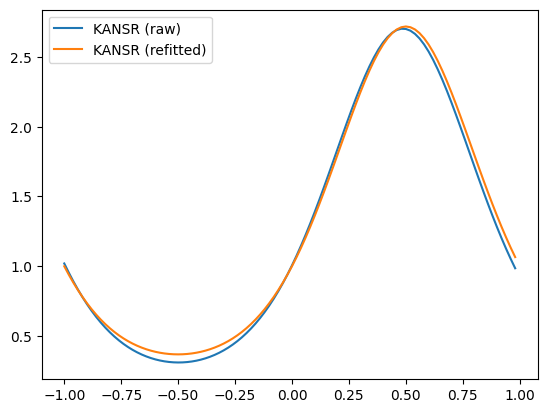

##################
# Final formula: #
##################
 ```1.0 + 3.1416*x0 + 0.5*(3.1416**2)*x0**2```
best expression: 1.0*exp(1.0*sin(3.1416*x0)), at index 0, with chi^2 2.1875495658978183e-15
initially: 1.1197703512704*exp(0.928998*sin(3.1902*x0 + 0.0176)) - 0.1325
then simplified: 1.1198*exp(0.929*sin(3.1902*x0 + 0.0176)) - 0.1325, chi^2 2.1875495658978183e-15
then refitted: 1.0*exp(1.0*sin(3.1416*x0)), chi^2 2.1875495658978183e-15


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# # initialize KAN with G=3
# model = KAN(width=[1,1,1,1], grid=7, k=3, seed=0, device=device, symbolic_enabled=False)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x))
out_test = LLMSR.kan_sr.run_complete_pipeline(client, f, ranges=[-1,1], width=[1,2,1], grid=7, k=3, train_steps=100, gpt_model="openai/gpt-4o", node_th=0.1, edge_th=0.1, plot_parents=True, generations=3, population=3)